In [1]:
%matplotlib inline

In [2]:
from py4xs.local import ExpPara
from py4xs.data2d import Data2d,Axes2dPlot,DataType
import numpy as np
import pylab as plt
import matplotlib as mpl

In [3]:
ep = ExpPara(619, 487)    # 

ene = 10790.6
wl = 2.*np.pi*1973/ene

ep.wavelength = wl
ep.det_orient = 0.
ep.det_tilt = -26.
ep.det_phi = 0.
ep.bm_ctr_x = -141.
ep.bm_ctr_y = 328.3
ep.ratioDw = 2.86
ep.grazing_incident = False
ep.flip = 1
ep.incident_angle = 2.0
ep.sample_normal = 0

ep.calc_rot_matrix()
ep.init_coordinates()

ep.mask.read_file("data/Sol-mask.WAXS1")

In [4]:
# data from Pilatus 300K
dw1 = Data2d("data/Sol-b_000018_WAXS1.cbf")
dw1.set_exp_para(ep)

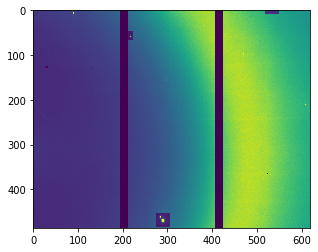

In [5]:
#plt.figure()
#ax = plt.gca()
fig = plt.figure()
ax = fig.add_subplot(111)
paxr = Axes2dPlot(ax, dw1.data, exp=ep)
# plotting the data twice with and without mask to show how well the mask works
paxr.plot()
paxr.plot(mask=ep.mask)
paxr.coordinate_translation="xy2qphi"
# the following operation only affect the most recent plot??
paxr.img.set_clim(0,14000)
plt.show()

In [6]:
qgrid = np.hstack((np.arange(0.005, 0.0499, 0.001),
                   np.arange(0.05, 0.0999, 0.002),
                   np.arange(0.1, 0.4999, 0.005),
                   np.arange(0.5, 0.9999, 0.01),
                   np.arange(1.0, 3.2,0.03)))

In [7]:
(Iq,dI) = dw1.conv_Iq(qgrid, mask=ep.mask)

/home/lyang/pro/py4xs/py4xs/data2d.py:350: RuntimeWarning: invalid value encountered in sqrt
  dI = np.sqrt(Iq2-Iq*Iq)


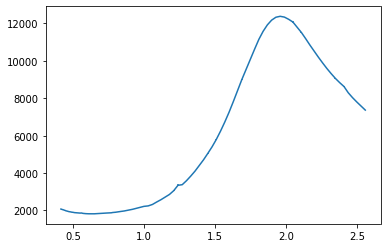

In [8]:
plt.figure()
plt.errorbar(qgrid, Iq, dI)
plt.show()

In [9]:
dw1.conv_Iqphi(500, 240, mask=ep.mask)

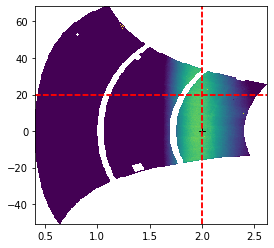

In [10]:
plt.figure()
ax = plt.gca()
paxr = Axes2dPlot(ax,dw1.qphi_data)
paxr.plot(aspect=np.radians(1.))
#paxr.set_color_scale(mpl.cm.gist_yarg)
paxr.img.set_clim(8000,14000)
paxr.mark_points([2.0], [0], "k+")
paxr.mark_coords([2.0], [20], "r--")
paxr.draw_dec()
plt.show()

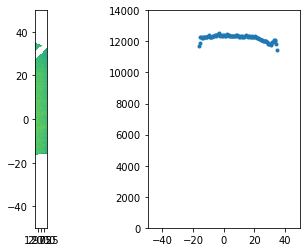

In [11]:
ret = dw1.qphi_data.roi(1.95, 2.05, -50, 50)

plt.figure()
plt.subplot(121)
ax = plt.gca()
paxr = Axes2dPlot(ax,ret)
paxr.plot(aspect=np.radians(1.))
paxr.img.set_clim(8000,14000)
plt.subplot(122)
plt.plot(ret.yc, ret.flatten(axis=1), ".")
plt.xlim([ret.yc[0], ret.yc[-1]])
plt.ylim([0, 14000])
plt.show()

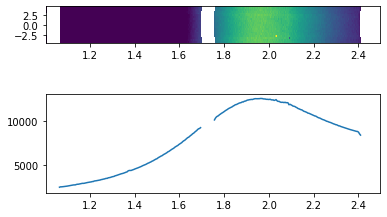

In [12]:
ret = dw1.qphi_data.roi(1.0, 2.5, -5, 5)

plt.figure()
plt.subplot(211)
ax = plt.gca()
paxr = Axes2dPlot(ax,ret)
paxr.plot(aspect=np.radians(1.))
paxr.img.set_clim(8000,14000)
plt.subplot(212)
plt.plot(ret.xc, ret.flatten(axis=0))
plt.xlim([ret.xc[0], ret.xc[-1]])
plt.show()